# Feature Extraction using VGG

One way to extract features is by using CNNs. For this purpose we will use VGG16.

The CNN should be used as fixed feature extractor on a new task. 

## Libraries

In [1]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import tensorflow as tf
from keras.layers import *
import keras
from IPython.display import clear_output

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

import cv2
import os

import itertools

In [3]:
from dataset import Dataset

## Setup

In [4]:
base_dir = '../dataset/'
train_folder = base_dir + 'Train/train_2/'
test_folder = base_dir + 'Test/test/'

## Dataset

The dataset is taken by Kaggle at the following link: https://www.kaggle.com/c/painter-by-numbers/data .

We have to resize all the image to be (224,224) to be readable from VGG.

In [5]:
input_size = (224, 224)
dataset_train = Dataset(train_folder, input_size)
dim_dataset_train = dataset_train.length()
print('Training dimension is: ' + str(dim_dataset_train) )

Training dimension is: 8476


In [6]:
print(dataset_train._image_list[:10])
print(dataset_train._image_size[:10])

['../dataset/Train/train_2/21043.jpg', '../dataset/Train/train_2/2704.jpg', '../dataset/Train/train_2/28852.jpg', '../dataset/Train/train_2/23796.jpg', '../dataset/Train/train_2/24358.jpg', '../dataset/Train/train_2/23309.jpg', '../dataset/Train/train_2/20530.jpg', '../dataset/Train/train_2/28397.jpg', '../dataset/Train/train_2/28935.jpg', '../dataset/Train/train_2/29880.jpg']
(224, 224)


Populating the interactive namespace from numpy and matplotlib


/home/davide/.local/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['average', 'subtract', 'dot', 'concatenate', 'minimum', 'maximum', 'multiply', 'add']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


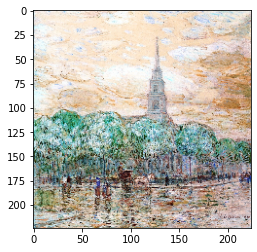

(224, 224, 3)


In [7]:
%pylab inline
img = dataset_train.get_image_by_filename( dataset_train._image_list[5] )
imgplot = plt.imshow(img)
plt.show()

print(img.shape)

## Models

In [8]:
#This give us all the model but the last layer
from tensorflow.keras.models import Model
base_model = VGG16(weights='imagenet')
base_model.summary()

2021-12-31 13:57:02.621283: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-31 13:57:02.688277: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-31 13:57:02.688461: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-31 13:57:02.689296: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

2021-12-31 13:57:04.317699: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 411041792 exceeds 10% of free system memory.


If we apply multiple cut we have multiple features. \
We have to find where to cut to extract usefull information.

In [9]:
model_1 = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output) # block4_pool

In [10]:
model_2 = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)

In [11]:
model_3 = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

### Model 1

In [15]:
for i in range(dim_dataset_train):
  im = dataset_train.get_image_by_index(i)

  clear_output(wait=True)
  print("{} / {} " .format(i+1, dim_dataset_train))
  print( im.shape )

  im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  #im = model_1.predict(im)
  im = Image.fromarray(im)
  file_name = dataset_train._image_list[i][dataset_train._image_list[i].rfind('/')+1:]
  im.save(base_dir + 'features/' +  file_name)

8475 / 8477 
(224, 224, 3)


### Model 2

### Model 3